# FigureYa111markerGene_step2_linuxMAC

小丫画图出品, 2019-6-30

欢迎关注“小丫画图”公众号，同名知识星球等你加入

小丫微信: epigenomics  E-mail: figureya@126.com

作者：徐洲更，欢迎关注他的简书<https://www.jianshu.com/u/9ea40b5f607a>

小丫编辑校验

* Step1: 打开FigureYa111markerGene_step1.Rmd运行

* Step2：然后用Jupyter notebook打开FigureYa111markerGene_step2_linuxMAC.ipynb运行

## 环境设置

下载并安装Anaconda发行版，<https://www.anaconda.com/distribution/#download-section>，里面有Jupyter notebook，linux和MAC系统用Jupyter notebook打开FigureYa111markerGene_step2_linuxMAC.ipynb。

Windows10请打开FigureYa111markerGene_step2_win10.ipynb

**ipynb文件用法参考这篇：**<https://mp.weixin.qq.com/s/G-CQhNEJBmMRuDe2kxND_w>

### 安装scanpy

In [67]:
#从GitHub上安装最新版
!pip install git+https://github.com/theislab/scanpy.git

## 加载环境

首先加载所需要的Python模块

In [68]:
from os.path import join
import scanpy as sc
import pandas as pd
from matplotlib import rcParams

然后设置一些环境参数，例如DPI，颜色设置

In [69]:
sc.set_figure_params(dpi=80, color_map='viridis')
sc.settings.verbosity = 2
sc.logging.print_versions()

scanpy==1.4.3+89.g0b0332b anndata==0.6.22rc1 umap==0.3.8 numpy==1.16.2 scipy==1.3.0 pandas==0.24.2 scikit-learn==0.20.3 statsmodels==0.10.0


color_map里的颜色挑选可以参考https://matplotlib.org/users/colormaps.html

## 读取数据

这里的路径是相对于你打开jupyter notebook的位置，比如我是在marker_plot.ipynb的同级目录下打开的jupyter notebook, 之前保存的数据就在"Seurat_preprocess/seurat/"

In [70]:
file_path = "seurat/"
ann = sc.read_10x_mtx(file_path)
medata = pd.read_csv(join(file_path, "metadata.csv"), index_col = 0)
ann.obs = medata
ann.var.index.name = 'index'

为了和Seurat的输出结果一致，要设置每个细胞类型的颜色, 下面的颜色只是举个例子。

In [71]:
cluster_color = ["#3378b6",
                 "#f67e00",
                 "#41a021",
                 "#cd2321",
                 "#9267bf",
                 "#88564a",
                 "#dc77c3",
                 "#7f7f7f",
                 "#bbbd00"]

## 通用参数

下面这些参数，是后续所有作图中都可以用的参数，

- var_names: 要展示的基因，可以单个基因名，也可以是列表，或者是字典
- groupby: 按照obs的某一列进行分组
- figsize: 图的大小， 或者通过`rcParams['figure.figsize'] = 长,宽`设置
- var_group_roration: 将轴的标签进行选择
- save: 保存到本地


## 开始画图

设置你需要展示的标记基因，分为两种形式，一种是列表(marker_genes)，另一种是字典格式（marker_genes_dict)

如果是列表形式，那么只要提供需要展示的标记基因即可，

如果是字典形式，则需要是'细胞类型: 基因'这种键值对格式

In [72]:
# 这是列表形式
marker_genes = ["IL7R", "CCR7","S100A4",
                 "CD14", "LYZ",
                 "MS4A1",
                 "CD8A",
                 "FCGR3A", "MS4A7",
                 "GNLY", "NKG7",
                 "FCER1A", "CST3",
                 "PPBP"]

In [73]:
# 这是字典形式
marker_genes_dict = {"Naive CD4 T": "CCR7", 
                     "Memory CD4 T": ["IL7R","S100A4"], 
                     "CD14+ Mono": ["CD14", "LYZ"], 
                     "B": "MS4A1" , 
                     "CD8 T":"CD8A", 
                     "FCGR3A+ Mono": ["FCGR3A", "MS4A7"], 
                     "NK" : ["GNLY", "NKG7"], 
                     "DC" : ["FCER1A", "CST3"], 
                     "Platelet": "PPBP"}

In [74]:
marker_genes_dict

{'Naive CD4 T': 'CCR7',
 'Memory CD4 T': ['IL7R', 'S100A4'],
 'CD14+ Mono': ['CD14', 'LYZ'],
 'B': 'MS4A1',
 'CD8 T': 'CD8A',
 'FCGR3A+ Mono': ['FCGR3A', 'MS4A7'],
 'NK': ['GNLY', 'NKG7'],
 'DC': ['FCER1A', 'CST3'],
 'Platelet': 'PPBP'}

### 画Stacked violins

和Seurat的小提琴图类似，但是更好看.

其中`row_palette`参数用来设置每一行的颜色。

**注意**Scanpy目前不支持通过字典定义每个行应该是什么颜色，因此得根据最终结果，来调整颜色的顺序。

... storing 'orig.ident' as categorical
... storing 'bulk_labels' as categorical


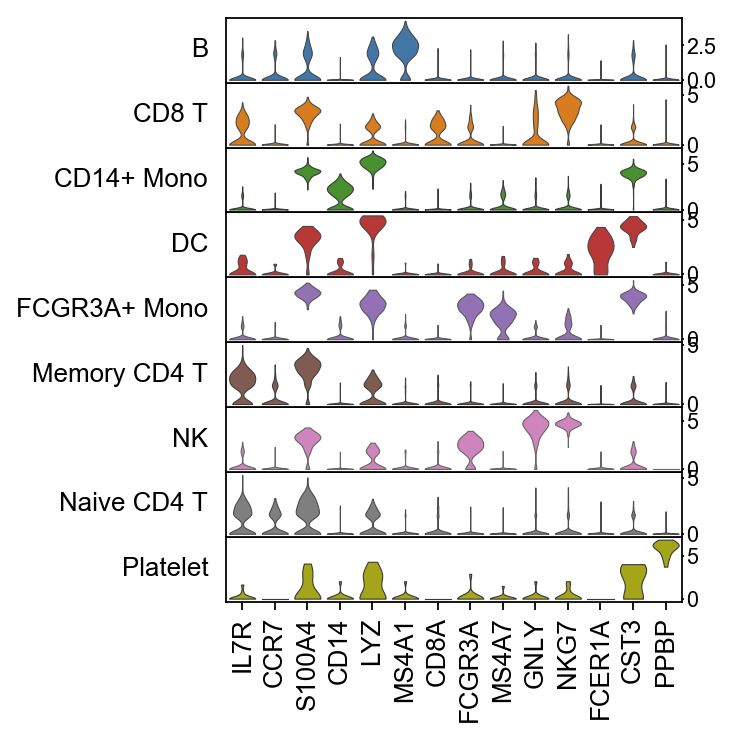

In [75]:
# 列表形式
ax = sc.pl.stacked_violin(ann, var_names =  marker_genes, groupby='bulk_labels', row_palette=cluster_color)

In [76]:
?sc.pl.stacked_violin

In [77]:
# 字典形式
ax = sc.pl.stacked_violin(ann, var_names = marker_genes_dict , groupby='bulk_labels', row_palette=cluster_color)

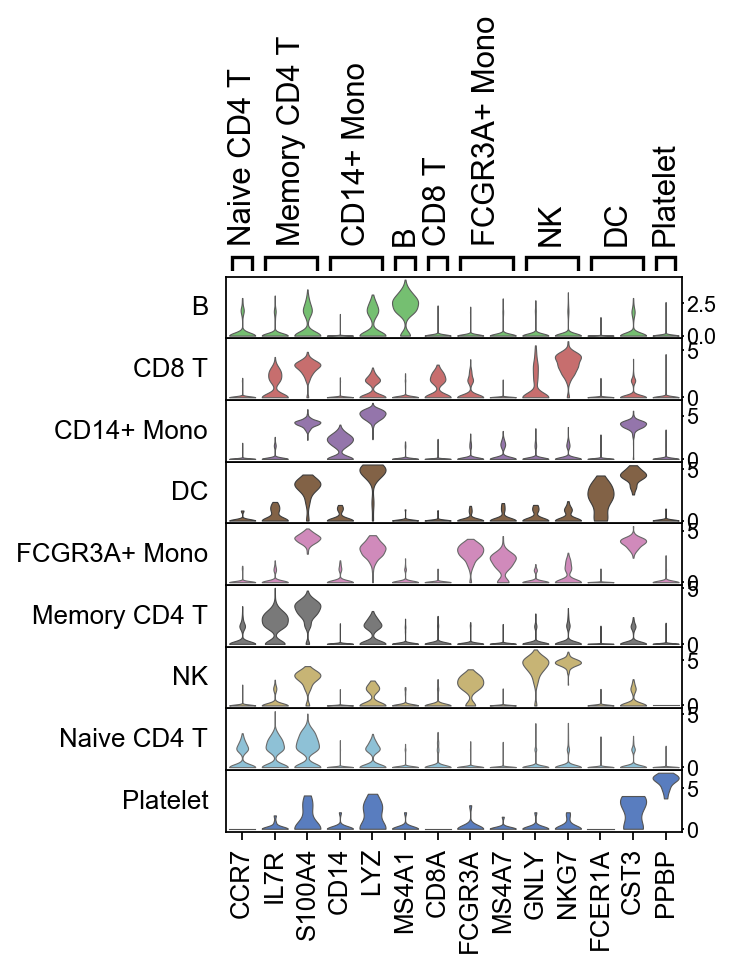

In [78]:
# 保存, 默认输出在Figures下
ax = sc.pl.stacked_violin(ann, var_names = marker_genes_dict , groupby='bulk_labels', save="stacked_violin.pdf")

### 画Dot plots

点图中，点的**大小**表示有多少比例的细胞表达该基因， 点的**颜色**表示该基因的**平均表达量**

可以调整的参数如下:

- dendrogram: True 或 False, 如果是True 表示要将分组进行重排，以树状图的形式展示（其实没啥必要）
- dot_max: 最多是50%的细胞表达基因
- dot_min: 最多是30%的细胞表达基因
- standard_scale: 标准到0-1

可以用`?sc.pl.dotplot`查看更多参数

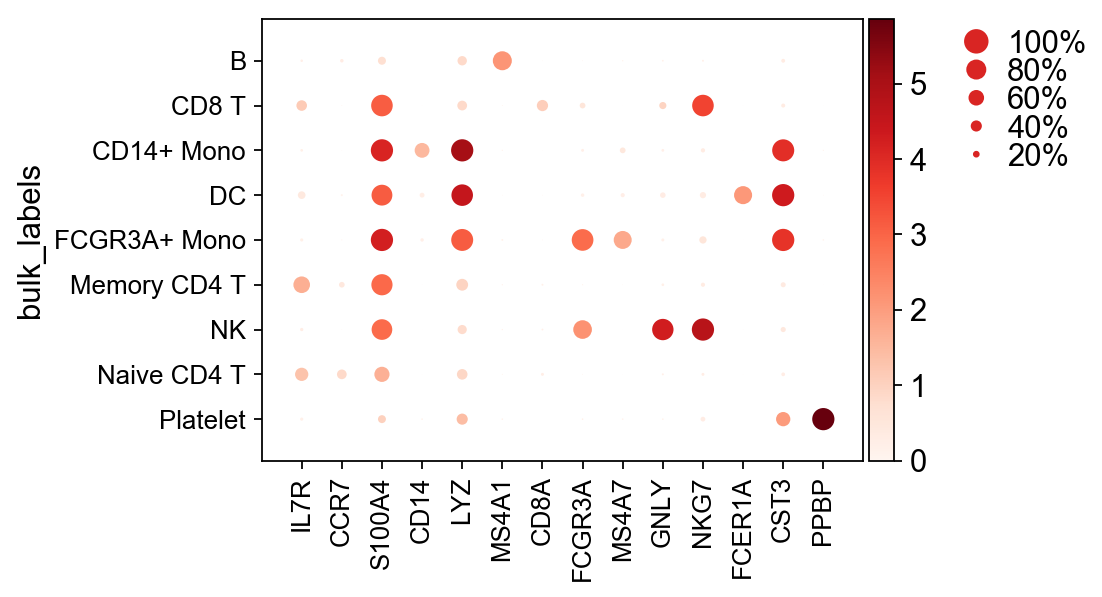

In [79]:
# 列表形式
ax = sc.pl.dotplot(ann, var_names = marker_genes, groupby='bulk_labels')

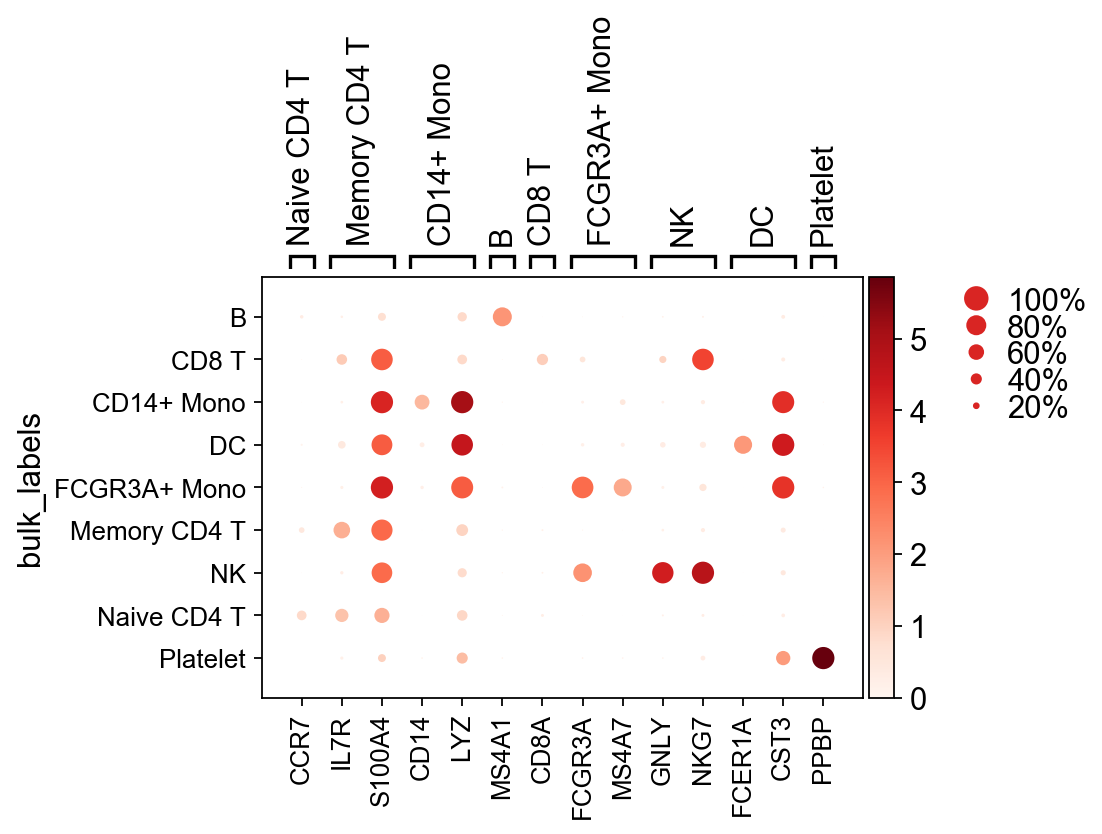

In [80]:
# 字典形式
ax = sc.pl.dotplot(ann,marker_genes_dict, groupby='bulk_labels')

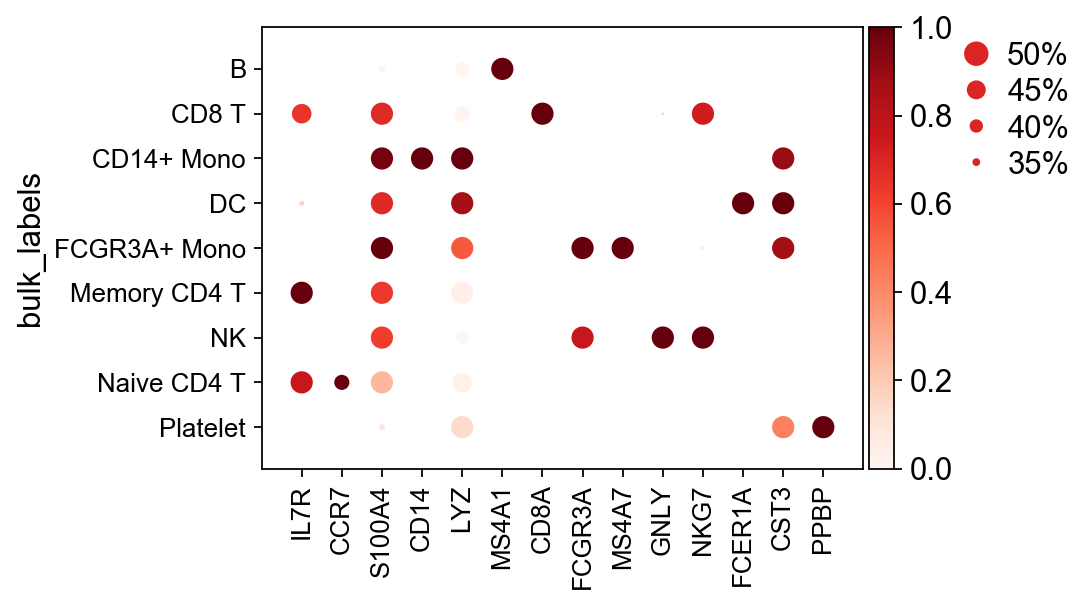

In [81]:
# 换个参数
ax = sc.pl.dotplot(ann,marker_genes, groupby='bulk_labels',dot_max=0.5, dot_min=0.3, standard_scale='var')

### 画Matrix Plots（需求描述中例文的图）

展示标记基因在不同细胞类群里的平均表达量，个人感觉没有点图的信息量大

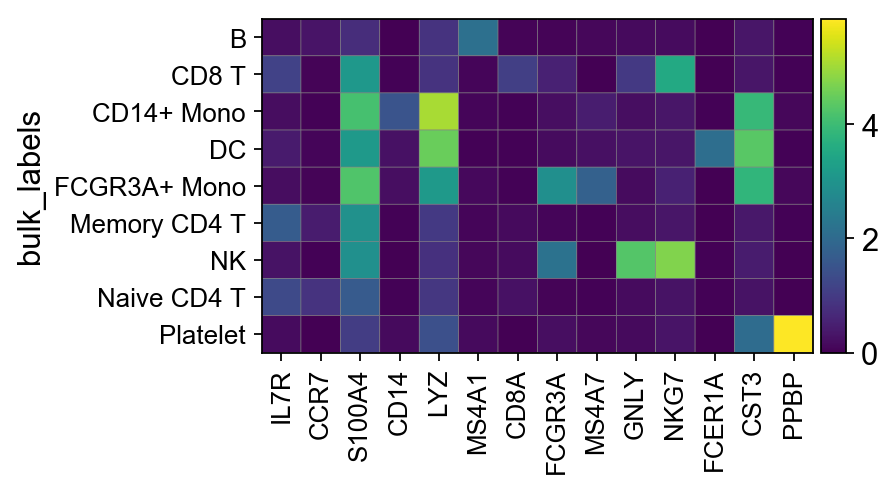

In [82]:
gs = sc.pl.matrixplot(ann,marker_genes, groupby='bulk_labels')

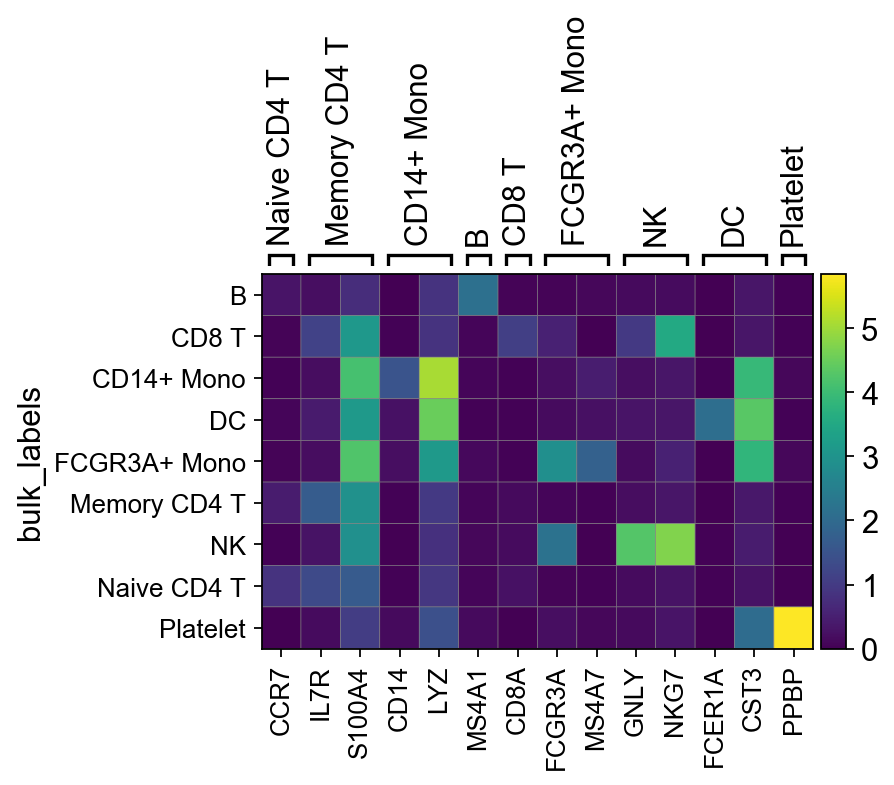

In [83]:
# 字典形式
gs = sc.pl.matrixplot(ann,marker_genes_dict, groupby='bulk_labels')

### 画Heatmaps

相对于之前的Matrix plots, 不是展示均值，而是每个细胞的表达量

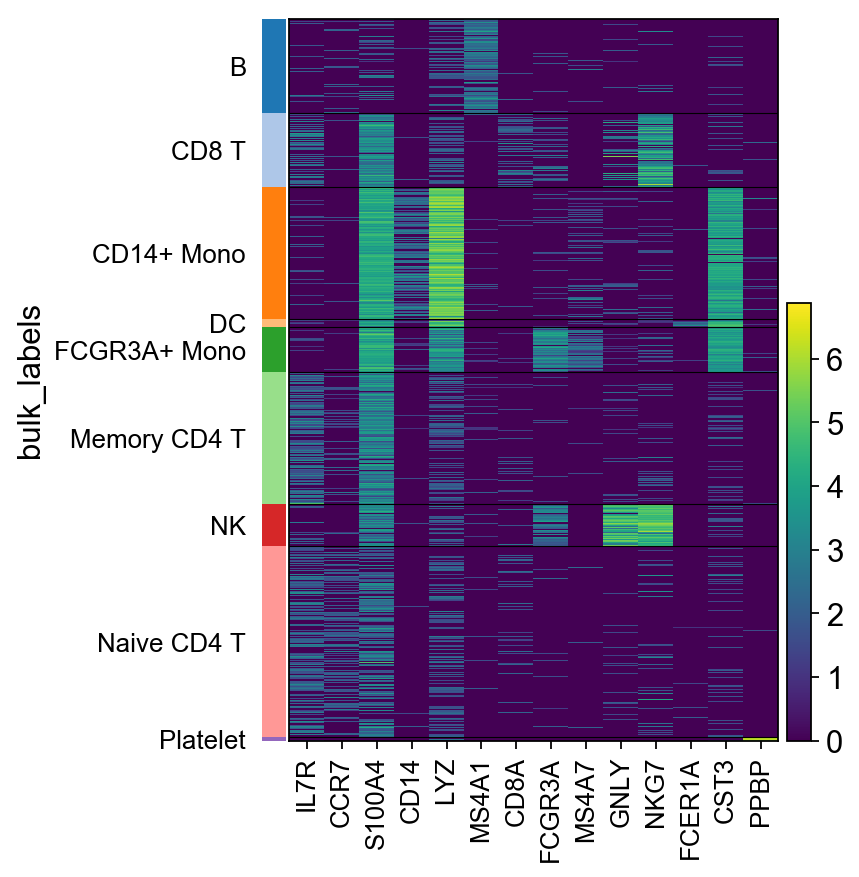

In [84]:
# 列表形式
ax = sc.pl.heatmap(ann,marker_genes, groupby='bulk_labels')

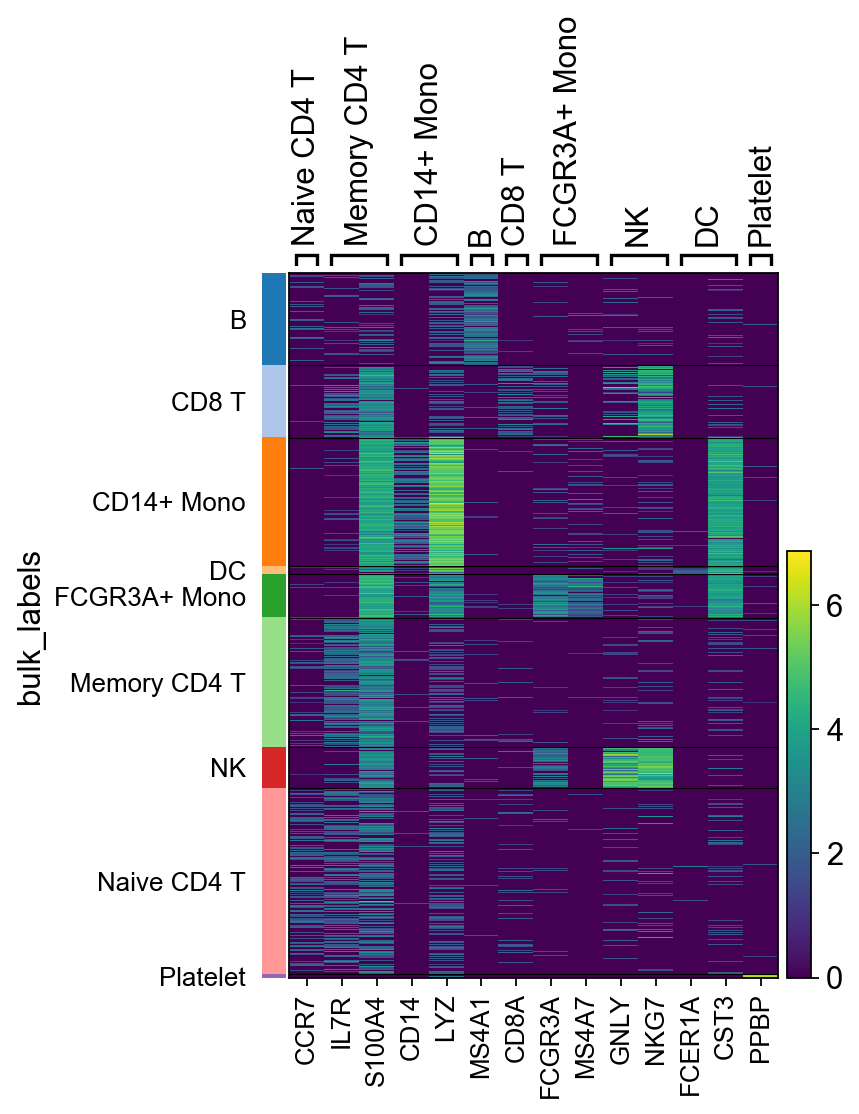

In [85]:
# 字典形式
ax = sc.pl.heatmap(ann,marker_genes_dict, groupby='bulk_labels')

### 画Tracksplots

Tracksplots和Heatmap展现信息一样，但是通过高度的方法展现表达量

In [86]:
import numpy as np
ad = ann.copy()
ad.X.data = np.exp(ad.X.data)

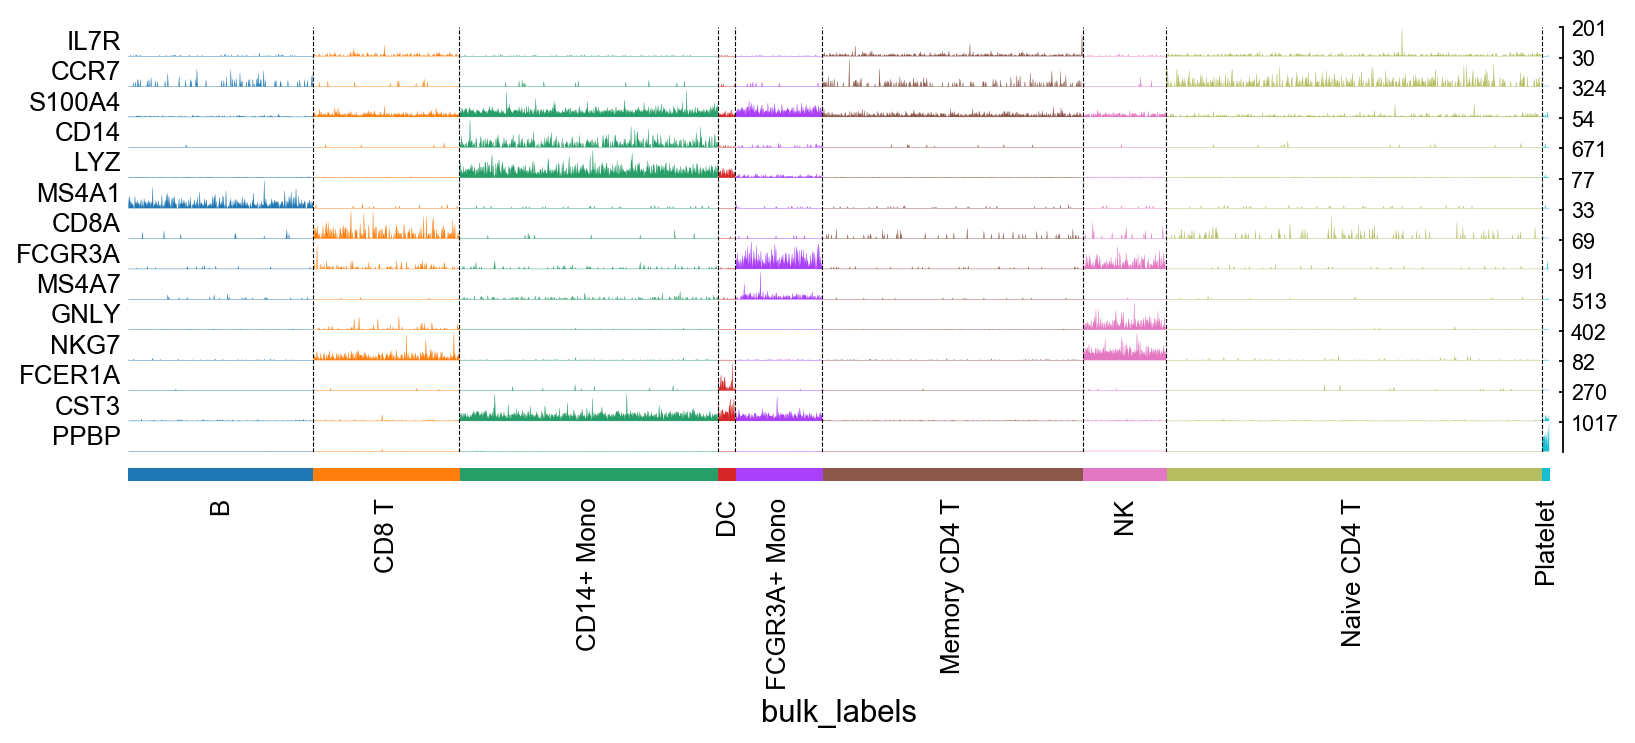

In [87]:
ax = sc.pl.tracksplot(ad,marker_genes, groupby='bulk_labels',row_palette=cluster_color)

## 参考资料

https://scanpy-tutorials.readthedocs.io/en/latest/visualizing-marker-genes.htm

In [5]:
import IPython
print(IPython.sys_info())

!jupyter nbconvert --to html FigureYa111markerGene_step2_linuxMAC.ipynb

{'commit_hash': 'd774f565b',
 'commit_source': 'installation',
 'default_encoding': 'UTF-8',
 'ipython_path': '/anaconda3/lib/python3.7/site-packages/IPython',
 'ipython_version': '7.4.0',
 'os_name': 'posix',
 'platform': 'Darwin-18.2.0-x86_64-i386-64bit',
 'sys_executable': '/anaconda3/bin/python',
 'sys_platform': 'darwin',
 'sys_version': '3.7.3 (default, Mar 27 2019, 16:54:48) \n'
                '[Clang 4.0.1 (tags/RELEASE_401/final)]'}
[NbConvertApp] Converting notebook FigureYa111markerGene_step2_linuxMAC.ipynb to html
[NbConvertApp] Writing 1713319 bytes to FigureYa111markerGene_step2_linuxMAC.html
